In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip
  


/bin/bash: /home/danieldu/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
wget: /home/danieldu/anaconda3/lib/libuuid.so.1: no version information available (required by wget)
--2023-10-11 18:14:45--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.43.27, 142.251.42.251, 172.217.163.59, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.43.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  29.8MB/s    in 5.0s    

2023-10-11 18:14:50 (28.5 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

/bin/bash: /home/danieldu/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
wget: /home/danieldu/anaconda3/lib/libuuid.so.1: no version information avail

In [2]:
import os
import zipfile

def extract_file(local_zip,dir):
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall(dir)
    zip_ref.close()
    
extract_file('/tmp/horse-or-human.zip','/tmp/horse-or-human')
extract_file('/tmp/validation-horse-or-human.zip','/tmp/validation-horse-or-human')

In [3]:
import tensorflow as tf

In [4]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 dropout (Dropout)           (None, 147, 147, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        1

2023-10-11 18:14:53.506684: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-11 18:14:53.506883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-11 18:14:53.531911: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-11 18:14:53.532141: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-11 18:14:53.532295: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

In [5]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

/home/danieldu/anaconda3/envs/protonx/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 1283 images belonging to 2 classes.


In [7]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/100


2023-10-11 18:14:58.957212: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8500
2023-10-11 18:14:59.464692: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.03GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-10-11 18:14:59.464723: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.03GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-10-11 18:14:59.940685: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory

1/8 [==>...........................] - ETA: 29s - loss: 0.6985 - accuracy: 0.4844

2023-10-11 18:15:00.195466: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.37GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-10-11 18:15:00.195504: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.37GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


8/8 [==============================] - 15s 2s/step - loss: 0.6938 - accuracy: 0.5250 - val_loss: 0.6878 - val_accuracy: 0.6289
Epoch 2/100
8/8 [==============================] - 15s 2s/step - loss: 0.6668 - accuracy: 0.5973 - val_loss: 0.6780 - val_accuracy: 0.7344
Epoch 3/100
8/8 [==============================] - 14s 2s/step - loss: 0.6303 - accuracy: 0.6852 - val_loss: 0.6670 - val_accuracy: 0.6758
Epoch 4/100
8/8 [==============================] - 15s 2s/step - loss: 0.6214 - accuracy: 0.6552 - val_loss: 0.6553 - val_accuracy: 0.7109
Epoch 5/100
8/8 [==============================] - 15s 2s/step - loss: 0.6176 - accuracy: 0.6741 - val_loss: 0.6471 - val_accuracy: 0.7344
Epoch 6/100
8/8 [==============================] - 14s 2s/step - loss: 0.5690 - accuracy: 0.7264 - val_loss: 0.6250 - val_accuracy: 0.7500
Epoch 7/100
8/8 [==============================] - 15s 2s/step - loss: 0.5781 - accuracy: 0.6830 - val_loss: 0.6056 - val_accuracy: 0.7500
Epoch 8/100
8/8 [======================

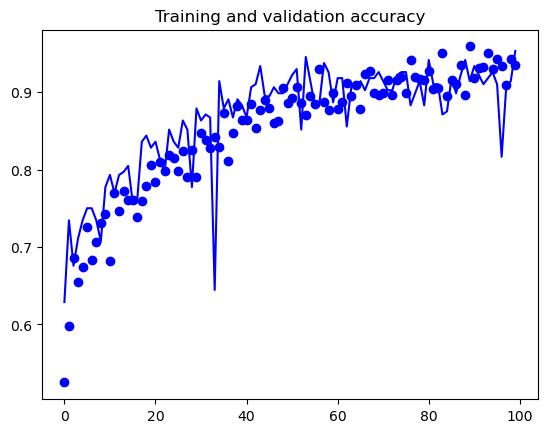

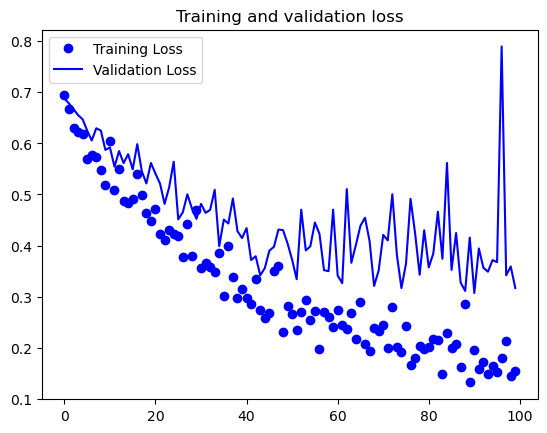

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
model.save("hh.h5")